# **Part 1: Exploratory Data Analysis**

## **Importing data**

In [ ]:
# Import necessary Libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import math
import seaborn as sb
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import pointbiserialr, spearmanr
from tabulate import tabulate
from shapely import wkt

In [ ]:
# Upload the Final_Final_Final
food = pd.read_csv('/content/final_final_final_dataset.csv')
food.rename(columns={'2022': 'Inflation'}, inplace=True)
food['Geometry'] = food['Geometry'].apply(wkt.loads)
food.rename(columns={'Geometry': 'geometry'}, inplace=True)
print(food.columns)
food

Index(['Country', 'Conflict', 'Overall score', 'United States',
       'United Kingdom', 'Germany', 'China', 'Netherlands', 'France', 'Canada',
       'Japan', 'Belgium', 'Italy', 'Shortest_Distance', 'Closest Country',
       'Weighted Average', 'Market Access', 'income_L', 'income_UM',
       'income_LM', 'income_H', 'Inflation', 'geometry', 'Conflict Flag',
       'Market Access Nearest'],
      dtype='object')


,Country,Conflict,Overall score,United States,United Kingdom,Germany,China,Netherlands,France,Canada,...,Weighted Average,Market Access,income_L,income_UM,income_LM,income_H,Inflation,geometry,Conflict Flag,Market Access Nearest
0,Algeria,10,58.9,9524.101077,2925.728564,2633.681183,9088.895760,2668.393961,1634.883790,7838.637705,...,5958.210208,111.328629,0.0,0.0,1.0,0.0,12.701900,POLYGON ((-4.821613117999902 24.99506459600009...,0,19.130555
1,Angola,19,43.7,14038.882323,7635.723037,7083.610259,10492.894760,7254.131482,6402.332434,12565.676033,...,10089.417624,46.332039,0.0,0.0,1.0,0.0,22.870395,MULTIPOLYGON (((13.073702840000067 -4.63532318...,0,2.973166
2,Argentina,0,64.8,10187.205076,11598.860261,12102.410193,19017.557742,11871.849796,10703.401522,11167.652101,...,12305.199332,35.726990,0.0,1.0,0.0,0.0,74.630560,MULTIPOLYGON (((-67.19390417499997 -22.8222234...,0,11.253922
3,Australia,0,75.4,13768.869139,15316.436936,14558.447947,7635.130076,14885.373916,15724.754872,14449.705300,...,13448.413965,33.517659,0.0,0.0,0.0,1.0,8.166700,MULTIPOLYGON (((131.53589928500003 -31.6055640...,0,4.045709
4,Austria,0,78.1,8416.281815,1394.152865,476.333500,7086.593311,809.859929,1455.889396,6487.692311,...,4466.288138,290.224170,0.0,0.0,0.0,1.0,10.748240,POLYGON ((16.945042766000142 48.60416615800007...,0,95.236714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,United States,1,78.0,0.000000,7086.076100,7940.247105,10172.141735,7629.163284,8028.814127,1971.140270,...,5492.892791,747.551156,0.0,0.0,0.0,1.0,11.438880,MULTIPOLYGON (((-122.75301682799991 48.9925145...,0,498.985763
103,Uruguay,0,71.8,10411.242961,10925.884854,11357.375204,18129.457223,11151.542961,9951.000190,11144.626952,...,11967.155149,36.747703,0.0,0.0,0.0,1.0,10.593382,POLYGON ((-57.602792548565105 -30.190516953885...,0,3.143024
104,Uzbekistan,0,57.5,10282.105793,4911.217109,4080.774437,3522.446741,4420.375349,5304.641611,8425.331933,...,6415.239797,76.572794,0.0,0.0,1.0,0.0,15.046252,MULTIPOLYGON (((71.7855196540001 39.9897048950...,0,10.853669
105,Vietnam,0,67.9,12060.623838,9703.596732,8978.210114,2227.995224,9288.195990,10259.310337,11069.748139,...,9254.414222,59.102038,0.0,0.0,1.0,0.0,2.413387,MULTIPOLYGON (((107.52039270000006 14.70458160...,0,17.159584


## **Exploratory Data Analysis**

#### **Summary Statistics**

In [ ]:
continuous_vars = [
    "Overall score",
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",         # This is the column for the year 2022
    "Conflict"
]

binary_vars = [
    "income_L",
    "income_UM",
    "income_LM",
    "income_H",
    "Conflict Flag"
]

In [ ]:
# # RAW VERSION
# # Loop over continuous variables and print their summary statistics
# print("CONTINUOUS VARIABLES SUMMARY\n" + "="*35)
# for col in continuous_vars:
#     print(f"Summary Statistics for {col}:")
#     print(food[col].describe())  # Using describe() for continuous stats
#     print()  # Blank line for readability

# # Loop over binary variables and print their summary statistics,
# # plus, also print the value counts to see the distribution of True/False (or 1/0)
# print("\nBINARY VARIABLES (Counts)\n" + "="*35)
# for col in binary_vars:
#     true_count = food[col].sum()  # Count of True/1
#     total_count = food[col].count()  # Total non-null values
#     false_count = total_count - true_count  # Count of False/0

#     print(f"Binary variable {col}:")
#     print(f"  Count of True/1: {true_count}")
#     print(f"  Count of False/0: {false_count}")
#     print()

In [ ]:
# SLIGHTLY NICER VERSION
print("\nCONTINUOUS VARIABLES SUMMARY")
print("=" * 40)
for col in continuous_vars:
    stats = food[col].describe().reset_index()
    print(f"Summary Statistics for {col}:")
    print(tabulate(stats, headers=["Statistic", "Value"], tablefmt="pretty"))
    print("\n")

print("\nBINARY VARIABLES SUMMARY")
print("=" * 40)
for col in binary_vars:
    stats = food[col].describe().reset_index()
    #print(f"Summary Statistics for {col}:")
    #print(tabulate(stats, headers=["Statistic", "Value"], tablefmt="pretty"))
    print(f"Value Counts for {col}:")
    print(tabulate(food[col].value_counts().reset_index().rename(columns={"index": "Value", col: "Count"}), headers="keys", tablefmt="pretty"))
    print("\n")


CONTINUOUS VARIABLES SUMMARY
Summary Statistics for Overall score:
+---+-----------+--------------------+
|   | Statistic |       Value        |
+---+-----------+--------------------+
| 0 |   count   |       107.0        |
| 1 |   mean    |  62.9373831775701  |
| 2 |    std    | 12.241774468770558 |
| 3 |    min    |        38.5        |
| 4 |    25%    |        52.8        |
| 5 |    50%    |        64.5        |
| 6 |    75%    |       73.55        |
| 7 |    max    |        83.7        |
+---+-----------+--------------------+


Summary Statistics for Shortest_Distance:
+---+-----------+--------------------+
|   | Statistic |       Value        |
+---+-----------+--------------------+
| 0 |   count   |       107.0        |
| 1 |   mean    | 3384.0579789647186 |
| 2 |    std    | 2558.5772166187153 |
| 3 |    min    |        0.0         |
| 4 |    25%    | 1289.3971045594162 |
| 5 |    50%    | 3271.836120719412  |
| 6 |    75%    | 4675.684089797902  |
| 7 |    max    | 10187.205076

#### **Histograms and Bars**

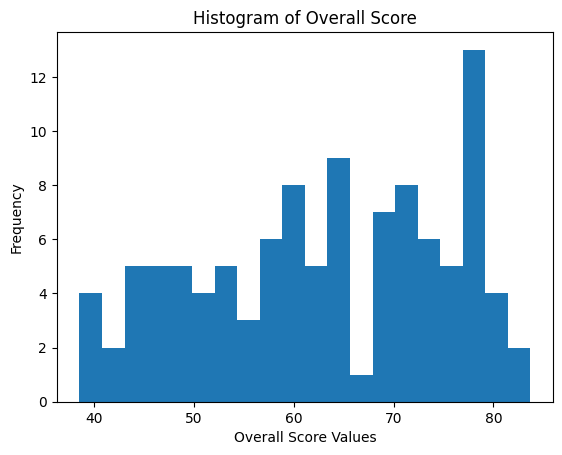

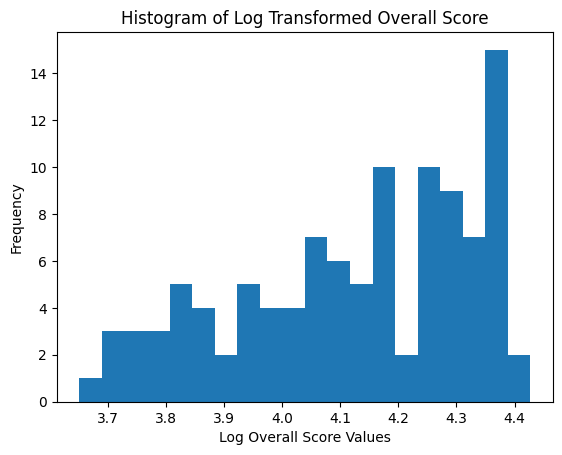

Optimal Lambda for Box-Cox Transformation (Overall Score): 1.4738154081807884


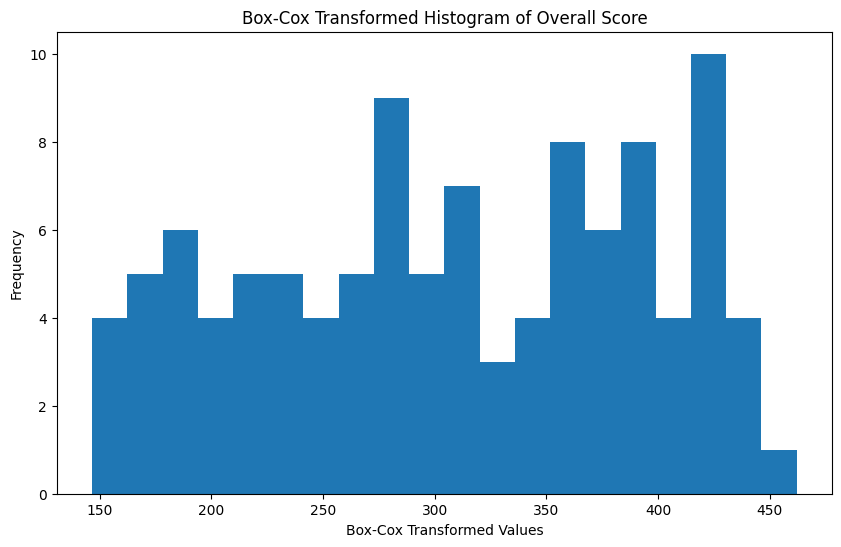

In [ ]:
# Overall Score
plt.hist(food['Overall score'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Overall Score")
plt.xlabel("Overall Score Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Overall score']), bins=20)  # Adjust bins as needed
plt.title("Histogram of Log Transformed Overall Score")
plt.xlabel("Log Overall Score Values")
plt.ylabel("Frequency")
plt.show()

# BoxCox
filtered_non_zero = food['Overall score'][food['Overall score'] > 0]
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Overall Score): {best_lambda}")

# Plot Box-Cox transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='#1f77b4')  # You can customize the color
plt.title("Box-Cox Transformed Histogram of Overall Score")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()

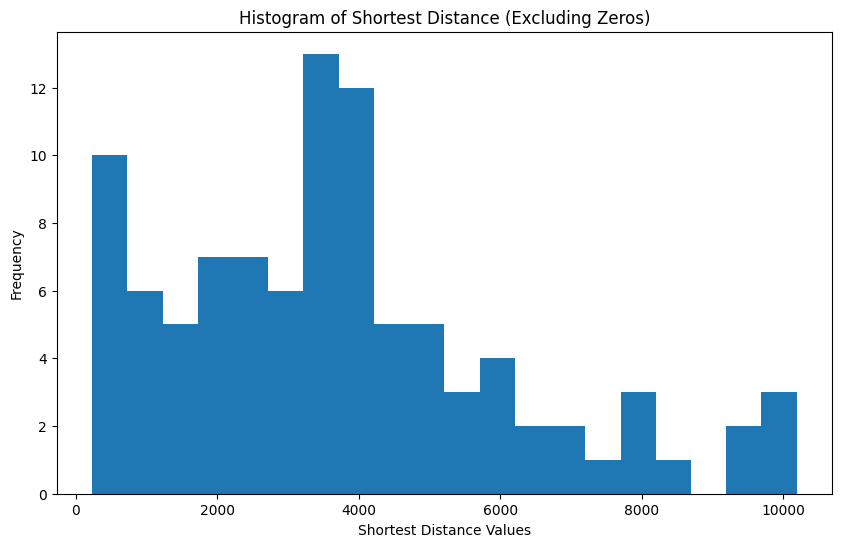

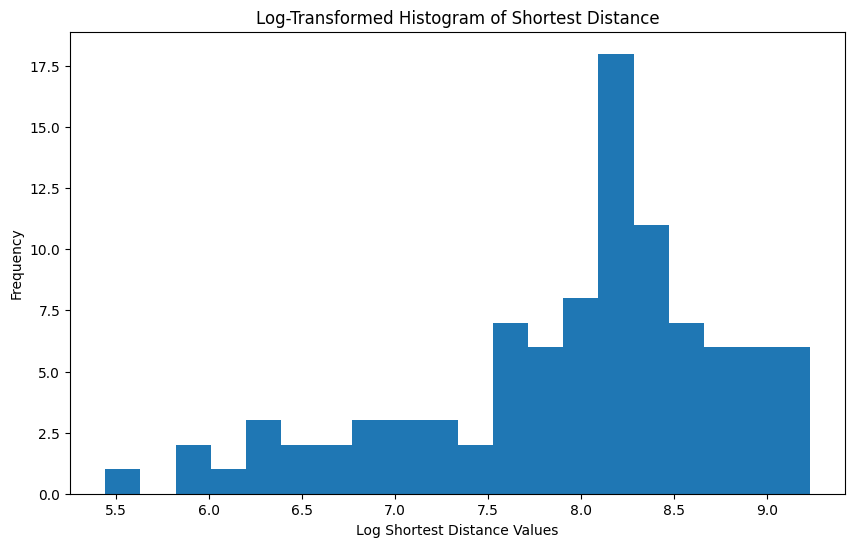

Optimal Lambda for Box-Cox Transformation (Shortest Distance): 0.4467125799937547


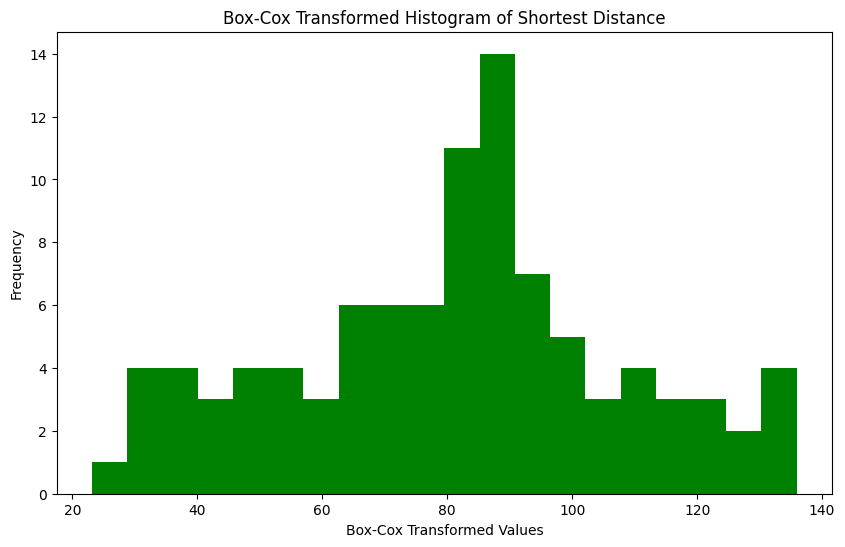

In [ ]:
# SHORTEST DISTANCE
# Filter data to remove NaNs and exclude zeros for Box-Cox
filtered_data = food['Shortest_Distance'].dropna()
filtered_non_zero = filtered_data[filtered_data > 0]

# Raw histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_non_zero, bins=20, color='#1f77b4')
plt.title("Histogram of Shortest Distance (Excluding Zeros)")
plt.xlabel("Shortest Distance Values")
plt.ylabel("Frequency")
plt.show()

# Log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log(filtered_non_zero + 1), bins=20, color='#1f77b4')
plt.title("Log-Transformed Histogram of Shortest Distance")
plt.xlabel("Log Shortest Distance Values")
plt.ylabel("Frequency")
plt.show()

# Box-Cox transformed histogram
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Shortest Distance): {best_lambda}")
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='green')
plt.title("Box-Cox Transformed Histogram of Shortest Distance")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()


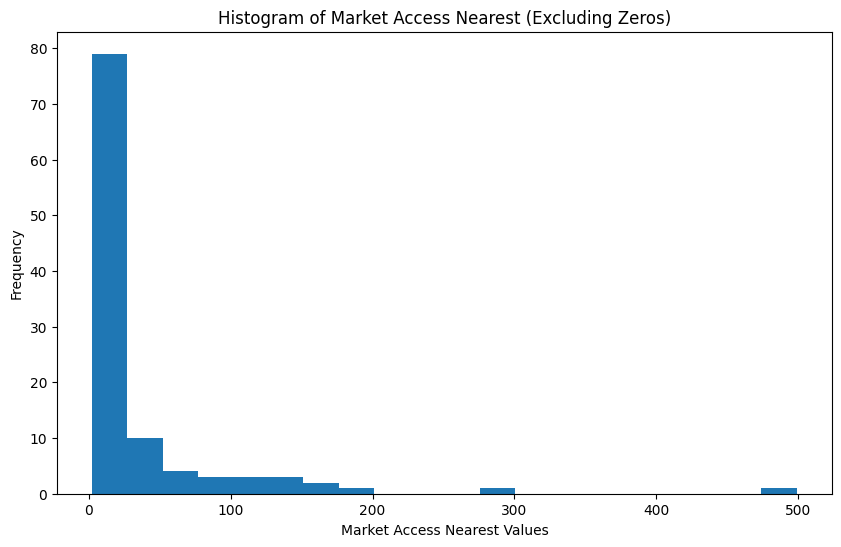

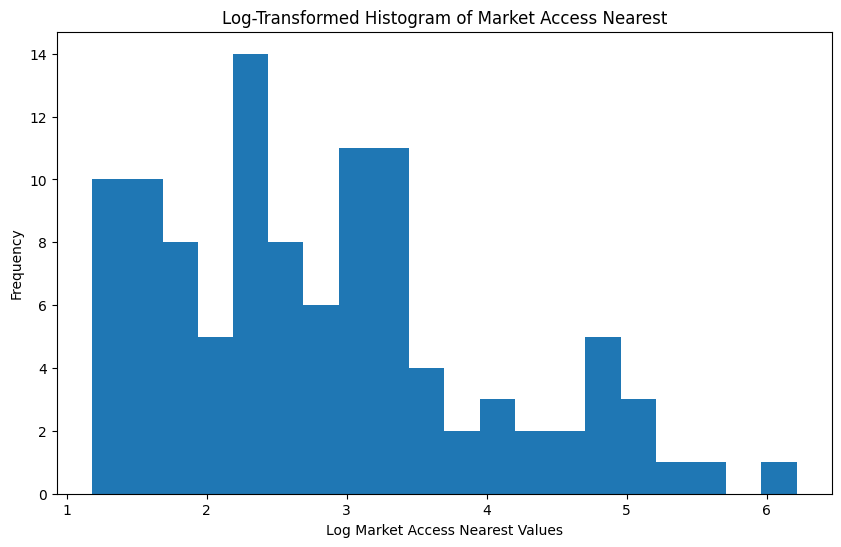

Optimal Lambda for Box-Cox Transformation (Market Access Nearest): -0.22322432230605263


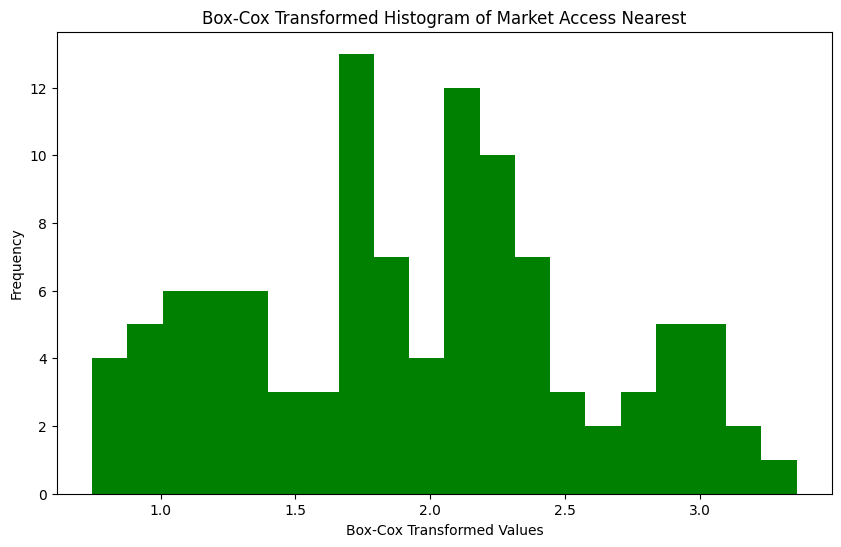

In [ ]:
# SHORTEST DISTANCE MARKET ACCESSS
# Filter data to remove NaNs and exclude zeros for Box-Cox
filtered_data = food['Market Access Nearest'].dropna()
filtered_non_zero = filtered_data[filtered_data > 0]

# Raw histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_non_zero, bins=20, color='#1f77b4')
plt.title("Histogram of Market Access Nearest (Excluding Zeros)")
plt.xlabel("Market Access Nearest Values")
plt.ylabel("Frequency")
plt.show()

# Log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log(filtered_non_zero + 1), bins=20, color='#1f77b4')
plt.title("Log-Transformed Histogram of Market Access Nearest")
plt.xlabel("Log Market Access Nearest Values")
plt.ylabel("Frequency")
plt.show()

# Box-Cox transformed histogram
transformed_data, best_lambda = boxcox(filtered_non_zero)
print(f"Optimal Lambda for Box-Cox Transformation (Market Access Nearest): {best_lambda}")
plt.figure(figsize=(10, 6))
plt.hist(transformed_data, bins=20, color='green')
plt.title("Box-Cox Transformed Histogram of Market Access Nearest")
plt.xlabel("Box-Cox Transformed Values")
plt.ylabel("Frequency")
plt.show()

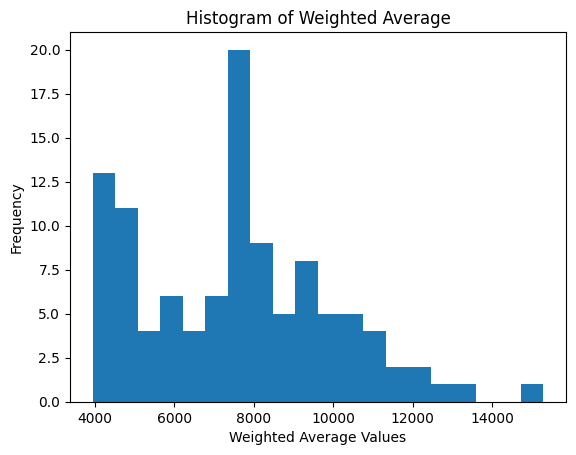

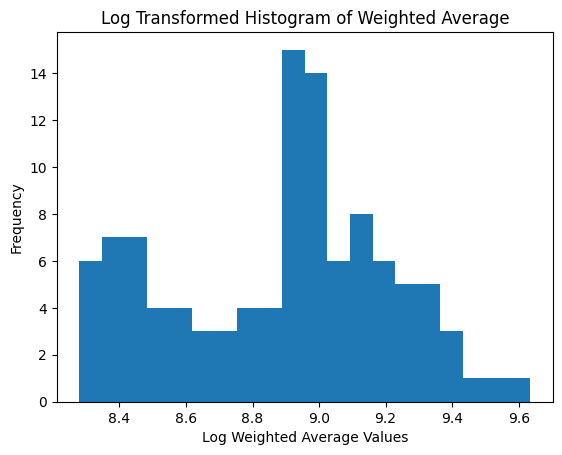

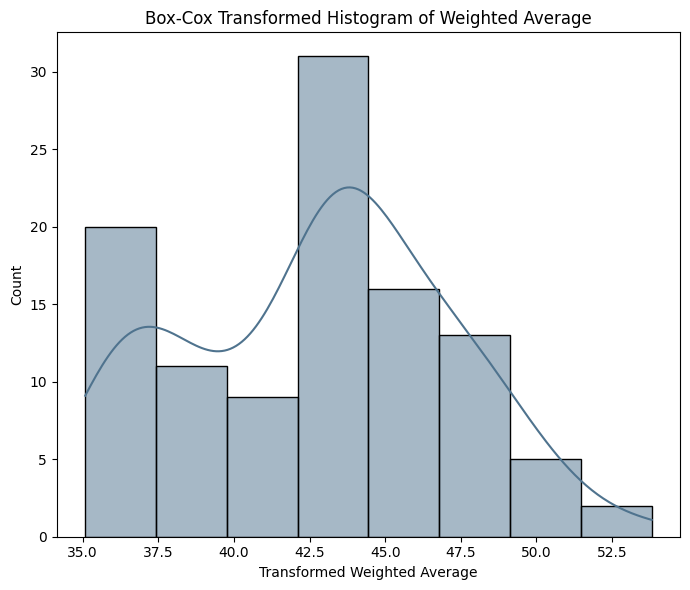

In [ ]:
# WEIGHTED AVERAGE OF HAVERSINE DISTANCES
# Plot Weighted Average
plt.hist(food['Weighted Average'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Weighted Average")
plt.xlabel("Weighted Average Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Weighted Average']), bins=20)  # Adjust bins as needed
plt.title("Log Transformed Histogram of Weighted Average")
plt.xlabel("Log Weighted Average Values")
plt.ylabel("Frequency")
plt.show()

# Plot BoxCox Transformation
transformed_data, best_lambda = boxcox(food['Weighted Average'])

# Visualize the original and the Box-Cox transformed distributions
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sb.histplot(transformed_data, kde=True, ax=ax, color='#4f738e')
ax.set_title("Box-Cox Transformed Histogram of Weighted Average")
ax.set_xlabel("Transformed Weighted Average")
plt.tight_layout()
plt.show()

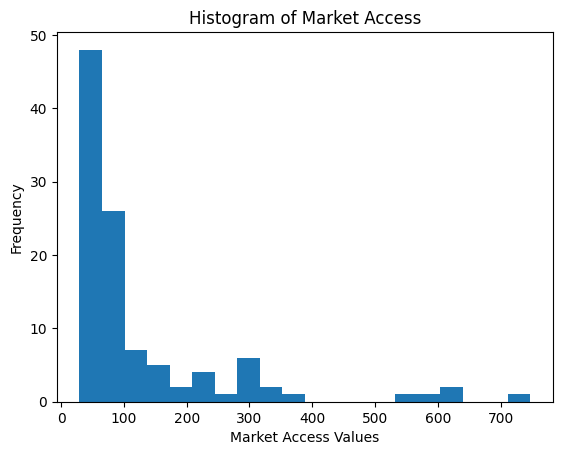

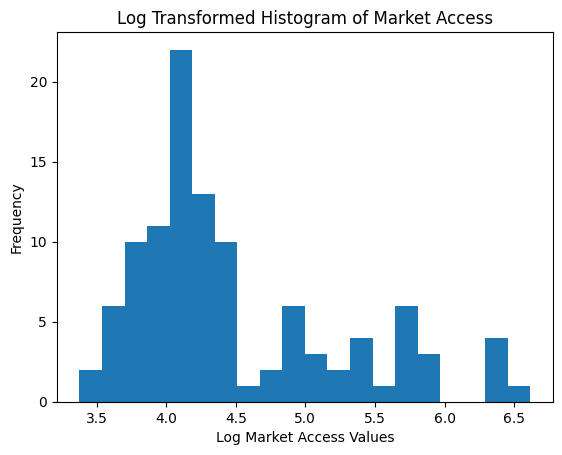

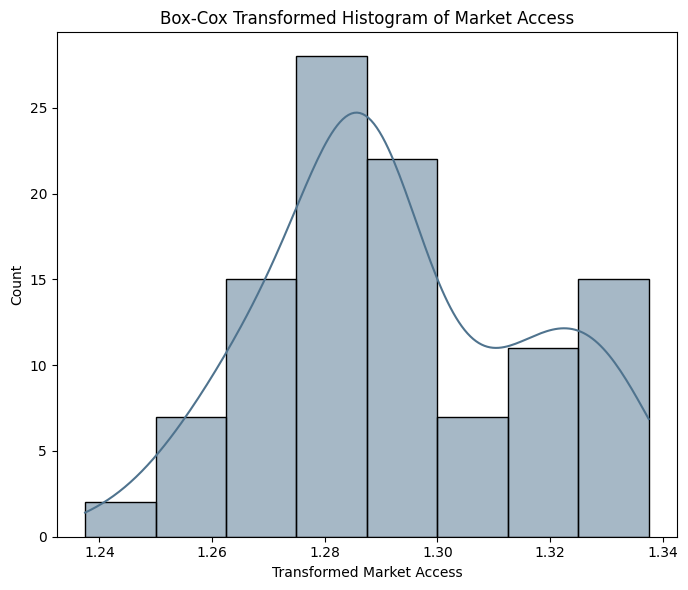

In [ ]:
# MARKET ACCESS TRANSFORMATION
# Plot Weighted Average
plt.hist(food['Market Access'], bins=20)  # Adjust bins as needed
plt.title("Histogram of Market Access")
plt.xlabel("Market Access Values")
plt.ylabel("Frequency")
plt.show()

# Plot Log Transformation
plt.hist(np.log(food['Market Access']), bins=20)  # Adjust bins as needed
plt.title("Log Transformed Histogram of Market Access")
plt.xlabel("Log Market Access Values")
plt.ylabel("Frequency")
plt.show()

# Plot BoxCox Transformation
transformed_data, best_lambda = boxcox(food['Market Access'])

# Visualize the original and the Box-Cox transformed distributions
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sb.histplot(transformed_data, kde=True, ax=ax, color='#4f738e')
ax.set_title("Box-Cox Transformed Histogram of Market Access")
ax.set_xlabel("Transformed Market Access")
plt.tight_layout()
plt.show()

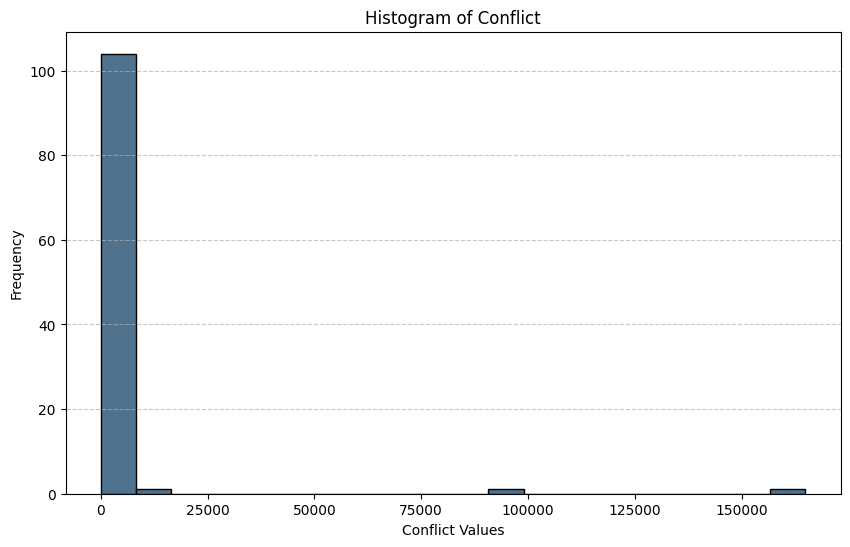

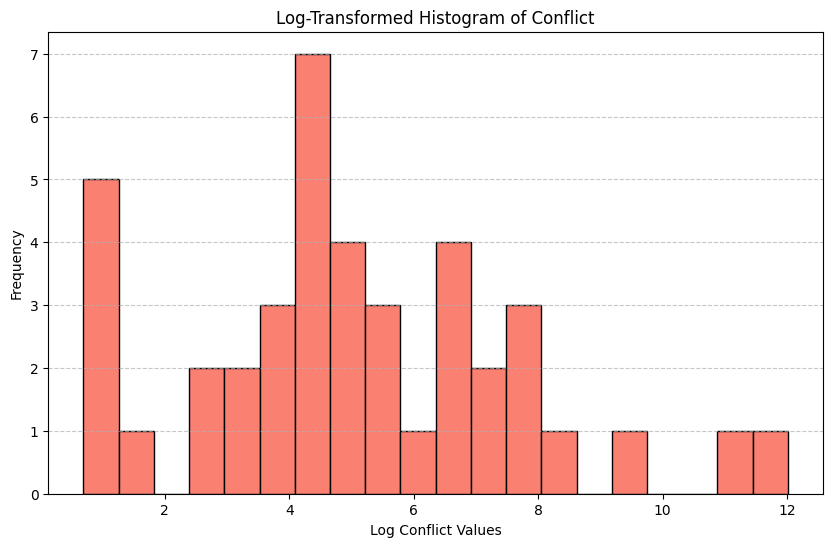

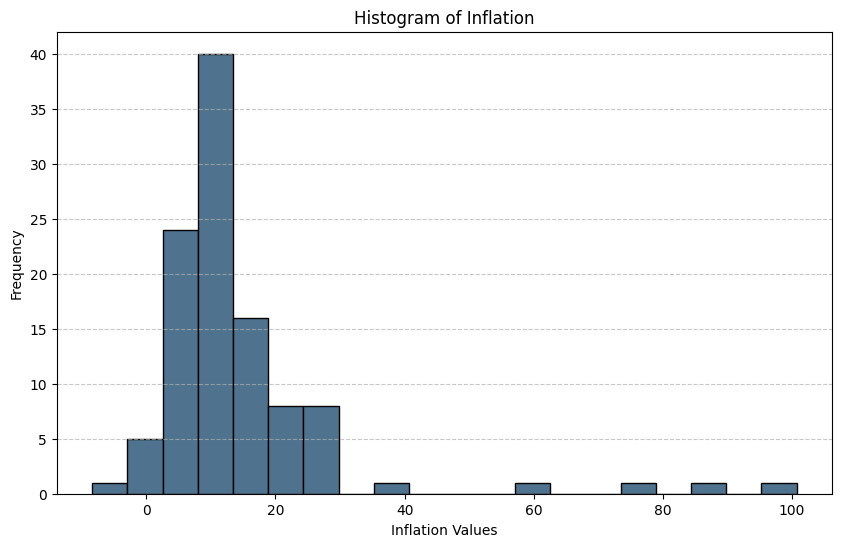

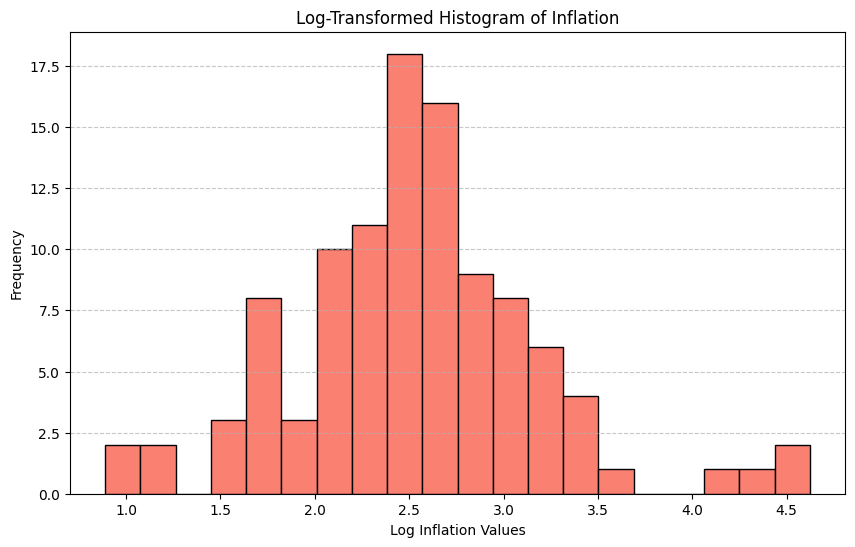

In [ ]:
# CONFLICT AND INFLATION
# ALTHOUGH CONFLICT WE ARE JUST USING IT AS BINARY VARIABLE BUT WHO KNOWS ALRIGHT
# Columns to plot
columns_to_plot = ['Conflict', 'Inflation']

# Loop through each column
for col in columns_to_plot:
    # Filter out NaN values
    filtered_data = food[col].dropna()

    # Raw histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_data, bins=20, color='#4f738e', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col} Values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Log-transformed histogram (filter for positive values only)
    positive_data = filtered_data[filtered_data > 0]  # Log requires strictly positive values
    plt.figure(figsize=(10, 6))
    plt.hist(np.log(positive_data + 1), bins=20, color='salmon', edgecolor='black')
    plt.title(f"Log-Transformed Histogram of {col}")
    plt.xlabel(f"Log {col} Values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

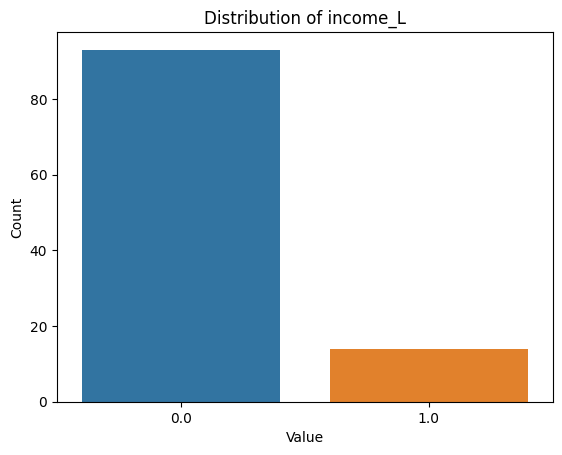

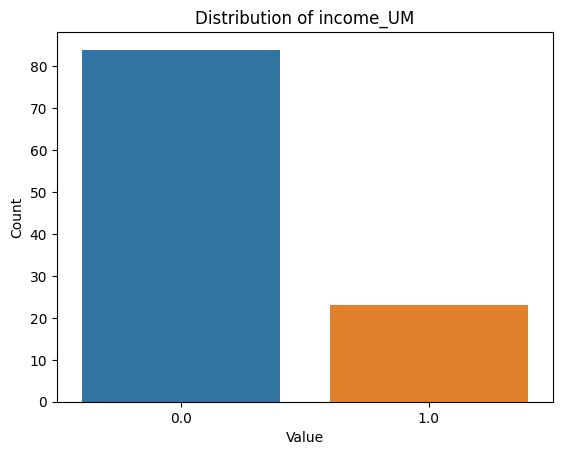

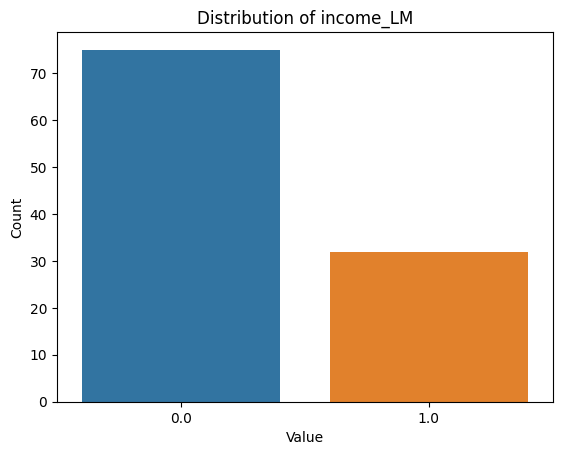

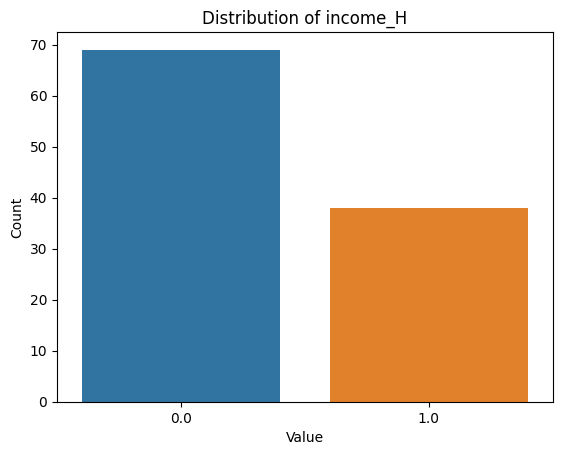

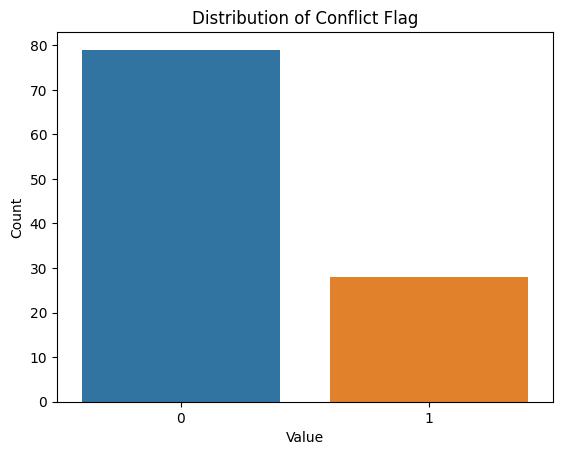

In [ ]:
# BINARY VARIABLES BART CHARTS
for col in binary_vars:
    value_counts = food[col].value_counts()
    sb.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette='tab10', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()


### **Scatter Plots**
- Note: Market Acess Linear transformation could be sqrt(x)

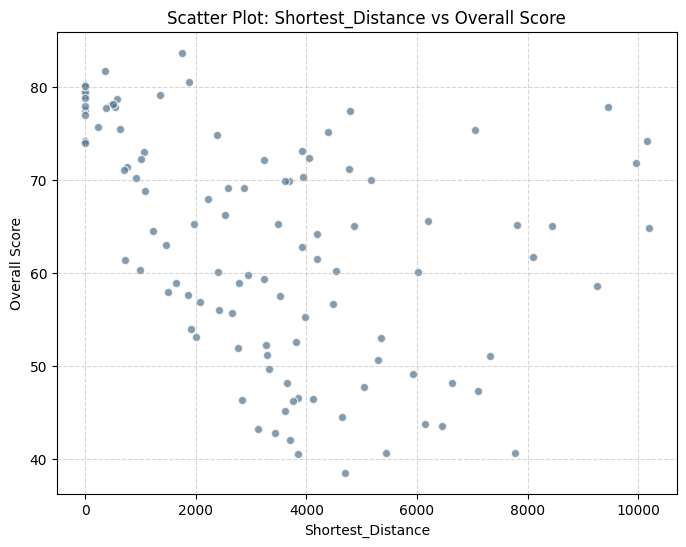

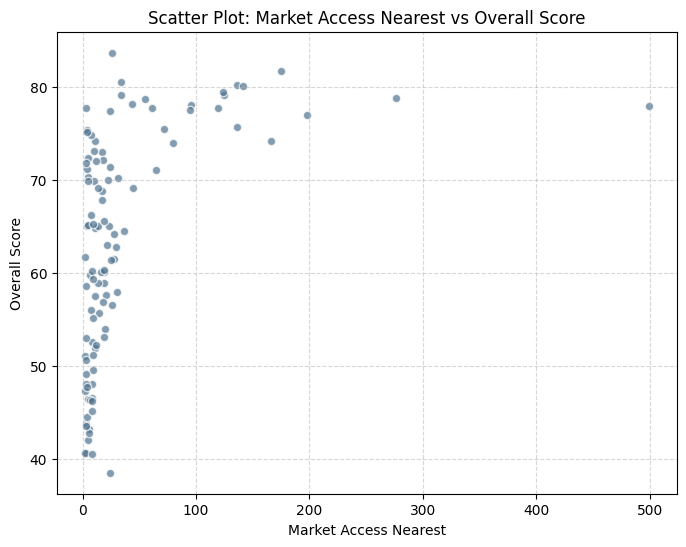

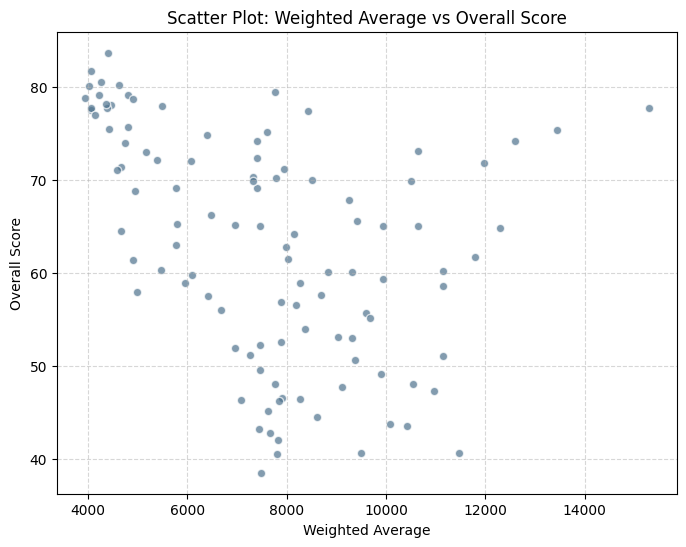

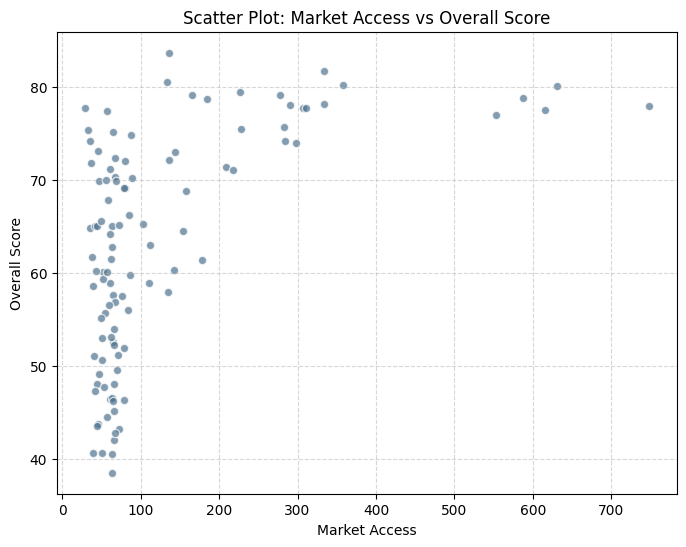

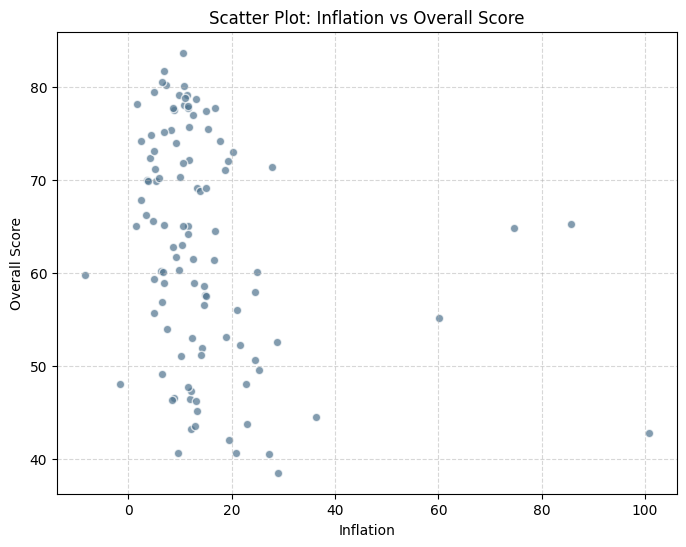

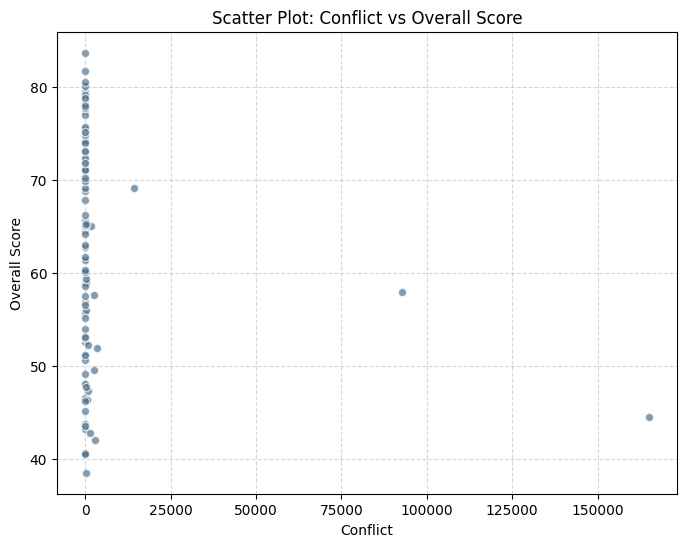

In [ ]:
# OVERALL FOOD SECURITY SCORE TO:
continuous_vars = [
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",
    "Conflict"
]

# Loop through the list and plot scatter plots
for col in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(food[col], food['Overall score'], alpha=0.7, edgecolor='w', color='#4f738e')
    plt.title(f"Scatter Plot: {col} vs Overall Score")
    plt.xlabel(col)
    plt.ylabel("Overall Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

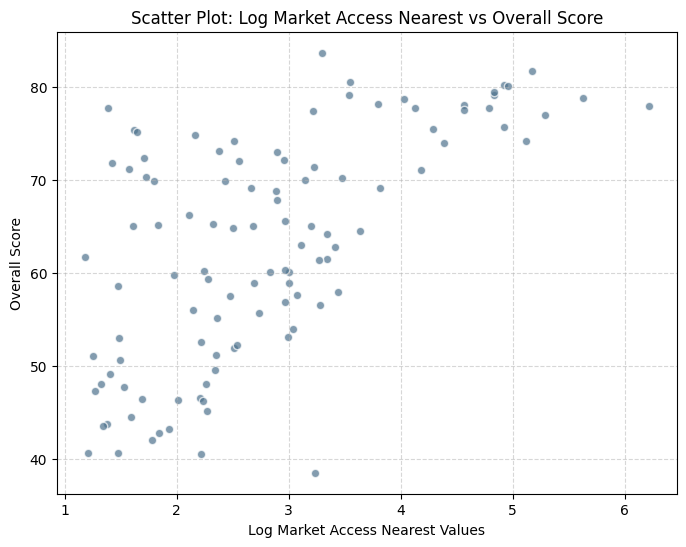

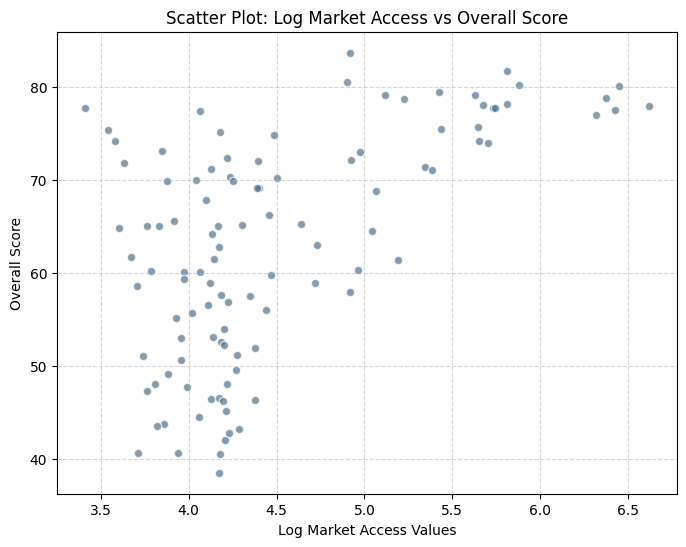

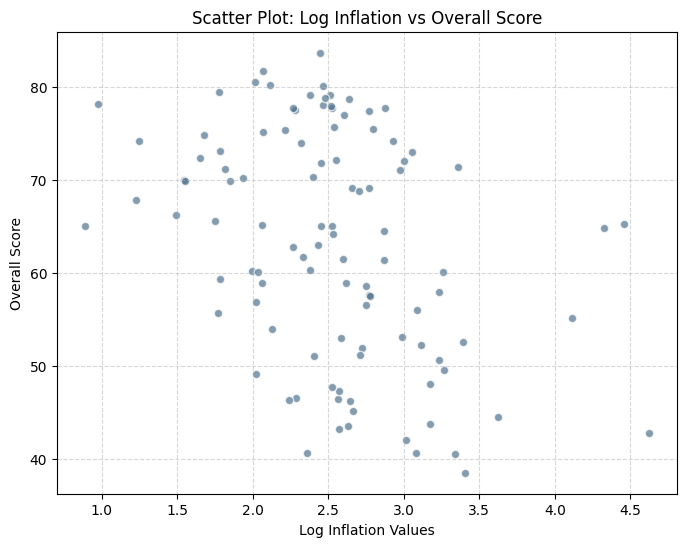

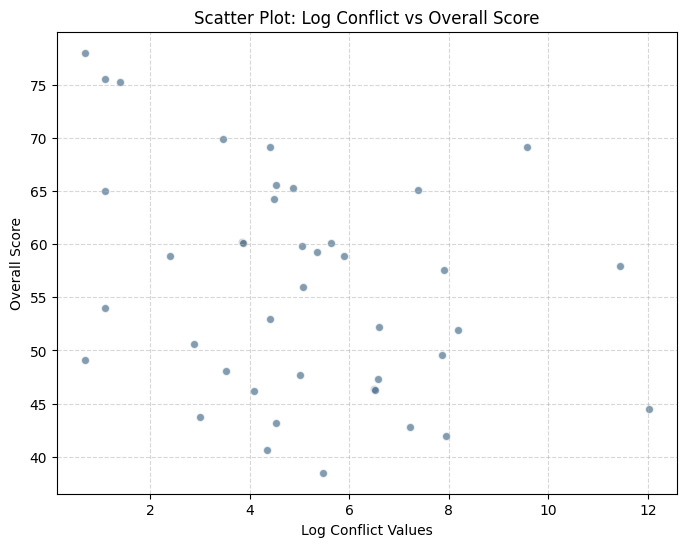

In [ ]:
# LOG VERSION OF SCATTERPLOT
continuous_vars = [
    #"Shortest_Distance",
    "Market Access Nearest",
    #"Weighted Average",
    "Market Access",
    "Inflation",
    "Conflict"
]

# Loop through the list to plot scatter plots with log-transformed x values
for col in continuous_vars:
    # Drop NaN values and ensure positive values for log transformation
    valid_x = food[col].dropna()
    valid_x = valid_x[valid_x > 0]  # Log requires positive values
    valid_y = food['Overall score'].dropna()

    # Align x and y to have the same indices
    common_indices = valid_x.index.intersection(valid_y.index)
    aligned_x = np.log(valid_x.loc[common_indices] + 1)  # Log transform the x values
    aligned_y = valid_y.loc[common_indices]

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(aligned_x, aligned_y, alpha=0.7, edgecolor='w', color='#4f738e')
    plt.title(f"Scatter Plot: Log {col} vs Overall Score")
    plt.xlabel(f"Log {col} Values")
    plt.ylabel("Overall Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

#### **Geopandas Maps**

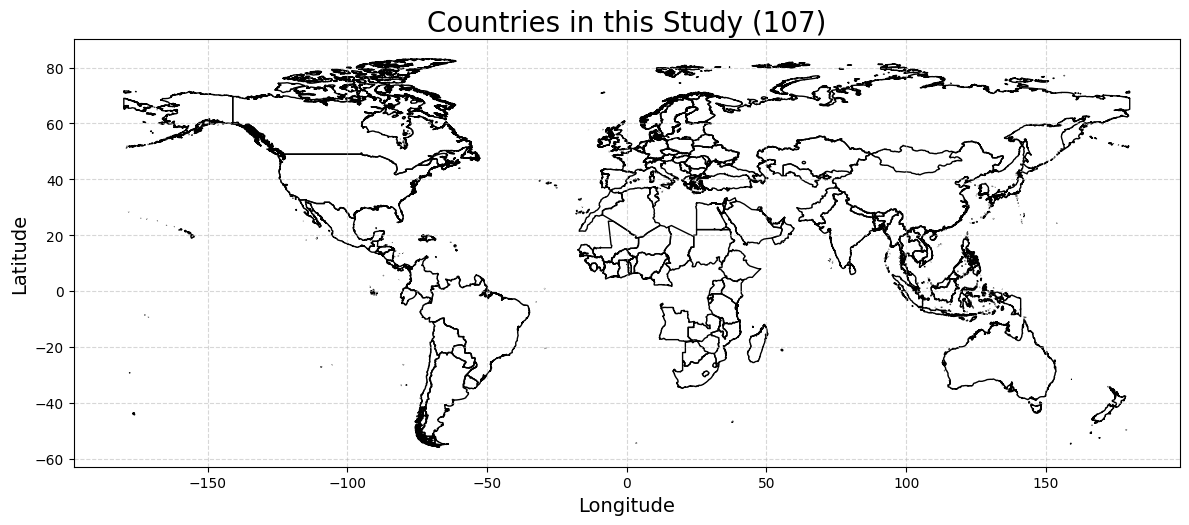

In [ ]:
# Countries in this Study:
# Convert to GeoDataFrame, telling GeoPandas which column holds the geometry
food_gdf = gpd.GeoDataFrame(food, geometry='geometry')

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 9), dpi=100)
food_gdf.plot(ax=ax, edgecolor='black', facecolor='none')
ax.set_title("Countries in this Study (107)", fontsize=20)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

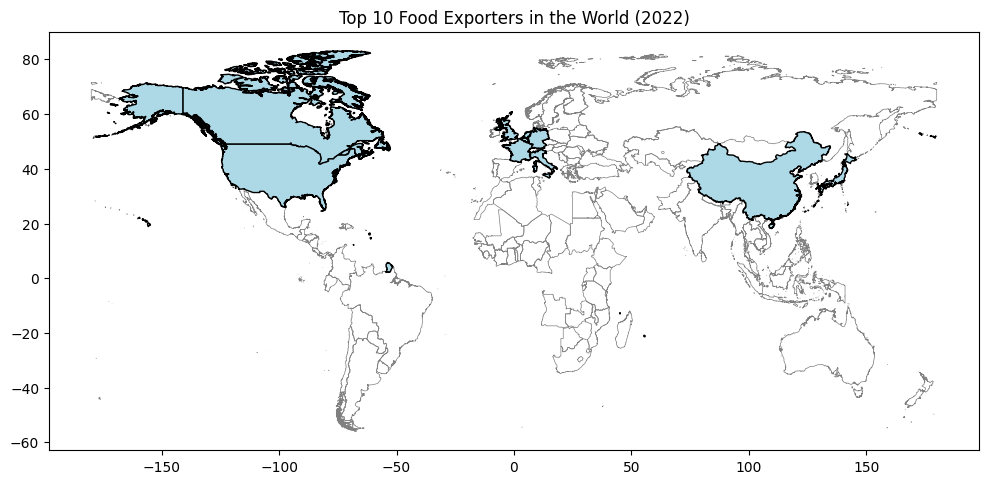

In [ ]:
# Top 10 Food Exporters
gdf = gpd.GeoDataFrame(food, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

# List of countries to be highlighted with red fill
blue_countries = [
    "United States", "United Kingdom", "Germany", "China",
    "Netherlands", "France", "Canada", "Japan", "Belgium", "Italy"
]

# Create two subsets: one for red-filled countries and one for the rest (outlined only)
gdf_blue = gdf[gdf['Country'].isin(blue_countries)]
gdf_other = gdf[~gdf['Country'].isin(blue_countries)]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot all but the highlighted countries with no fill (outline only)
gdf_other.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the highlighted countries with a fill and black border
gdf_blue.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1)

# Optional: add title and display the map
ax.set_title("Top 10 Food Exporters in the World (2022)")
plt.show()

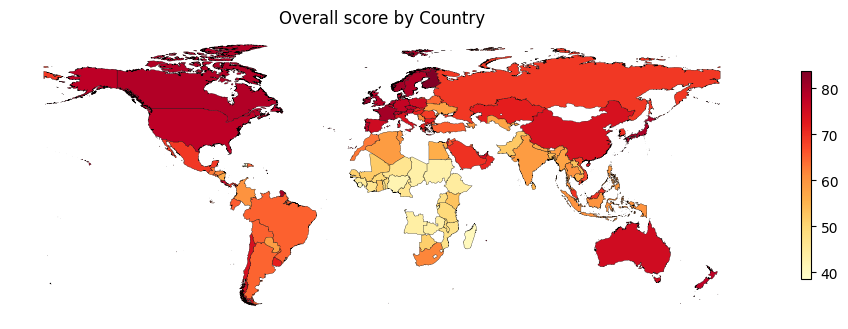

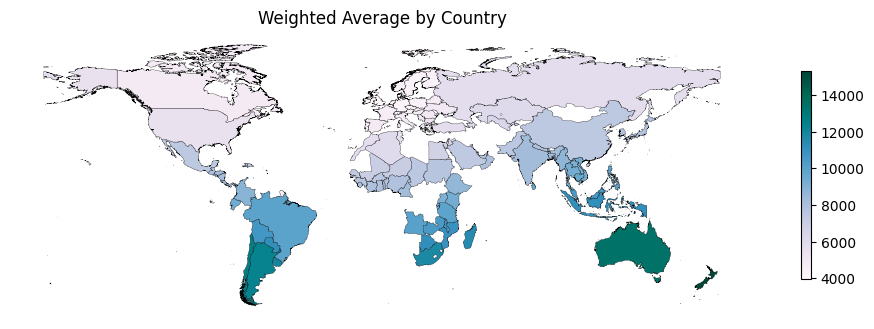

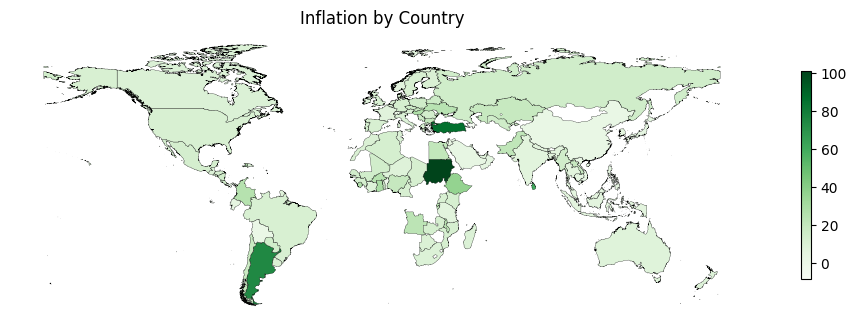

In [ ]:
# Chloropleths
numeric_cols = ['Overall score', 'Weighted Average', 'Inflation']
cmaps = ['YlOrRd', 'PuBuGn', 'Greens', 'OrRd']  # pick distinct colormaps

for col, cmap in zip(numeric_cols, cmaps):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    food_gdf.plot(
        column=col,
        cmap=cmap,
        legend=True,
        edgecolor='black',
        linewidth=0.2,
    legend_kwds={
        'shrink': 0.3,
    },
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "No data"
        },
        ax=ax
    )
    ax.set_title(f"{col} by Country")
    ax.set_axis_off()
    plt.show()

# NOTE: For Weighted Average, lower values are better.

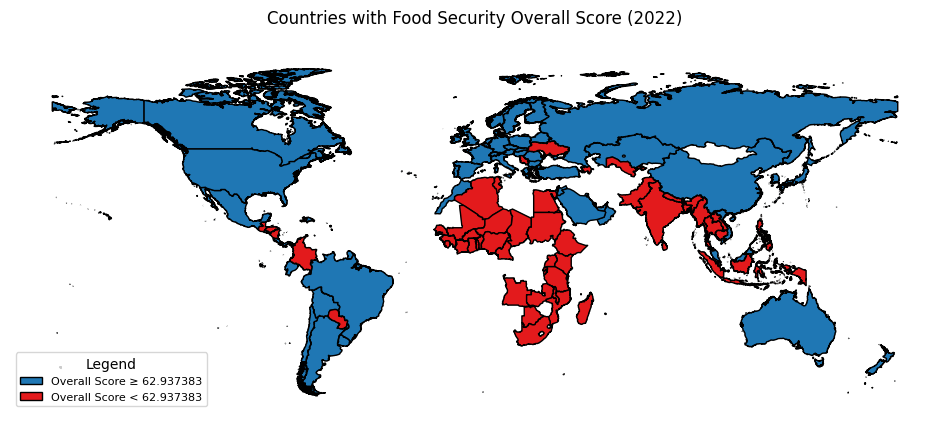

In [ ]:
# FOOD SECURITY SCORE ABOVE OR BELOW AVERAGE
gdf = gpd.GeoDataFrame(food, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  # Adjust the CRS if needed

# Define the threshold for Overall Score
threshold = 62.937383

# Create subsets for high (blue) and low (red) scores
gdf_high = gdf[gdf['Overall score'] >= threshold]
gdf_low = gdf[gdf['Overall score'] < threshold]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

# Plot all countries as outlines for context
gdf.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the countries with respective colors
gdf_high.plot(ax=ax, color="#1f77b4", edgecolor='black', linewidth=1)
gdf_low.plot(ax=ax, color="#e31a1c", edgecolor='black', linewidth=1)

# Set the title with an explanation of the colors
ax.set_title(
    f"Countries with Food Security Overall Score (2022)\n"
    #f"Blue: Overall Score ≥ {threshold} | Red: Overall Score < {threshold}"
)

ax.set_axis_off() # clean

# Create custom legend patches
legend_elements = [
    Patch(facecolor="#1f77b4", edgecolor='black', label=f'Overall Score ≥ {threshold}'),
    Patch(facecolor="#e31a1c", edgecolor='black', label=f'Overall Score < {threshold}')
]

# Add legend with smaller markers (using markerscale) and smaller text (using prop)
ax.legend(
    handles=legend_elements,
    title="Legend",
    loc='lower left',
    prop={'size': 8},
    markerscale=0.5
)

# Display the map
plt.show()

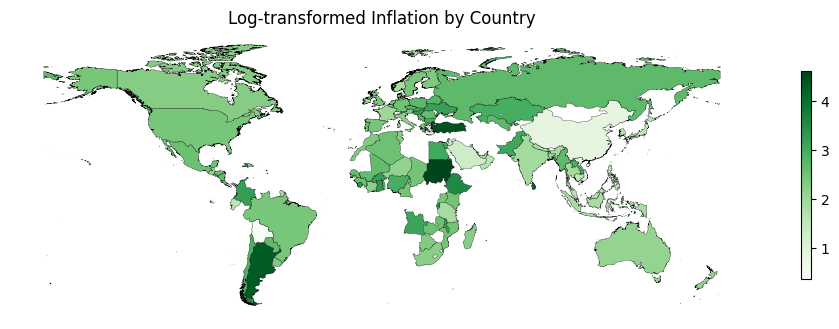

In [ ]:
# Inflation Chloropleth without Outliers
food_gdf['log_Inflation'] = (food_gdf['Inflation'] + 1e-6).apply(np.log)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
food_gdf.plot(
    column='log_Inflation',
    cmap='Greens',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    ax=ax,
    legend_kwds={
        'shrink': 0.3,
    }
)
ax.set_title("Log‐transformed Inflation by Country")
ax.set_axis_off()
plt.show()

<ipython-input-23-b12316cc3bcb>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-23-b12316cc3bcb>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


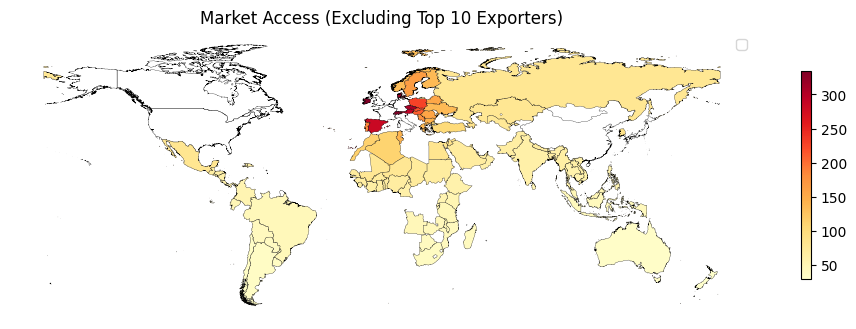

<ipython-input-23-b12316cc3bcb>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
<ipython-input-23-b12316cc3bcb>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


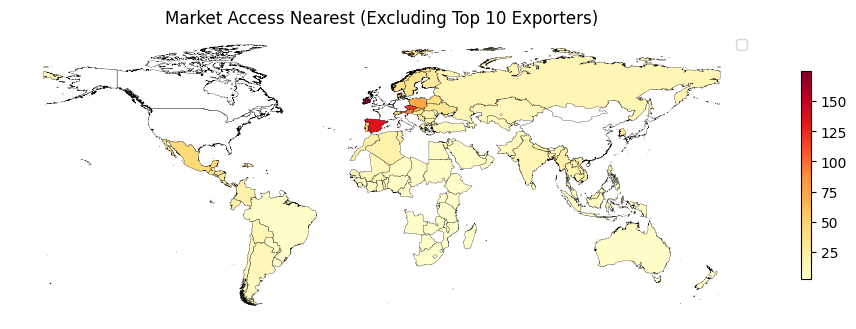

In [ ]:
# Market Access Heatmap Excluding Top 10 Exporters (Overall and from Shortest)
# Define the columns to map and their corresponding titles
columns = ["Market Access", "Market Access Nearest"]
titles = [
    "Market Access (Excluding Top 10 Exporters)",
    "Market Access Nearest (Excluding Top 10 Exporters)"
]

for col, title in zip(columns, titles):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))

    # 1) Plot blue countries as outlines only (excluded)
    food_gdf[food_gdf['Country'].isin(blue_countries)].plot(
        ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.2,
        label='Excluded (outlined)'
    )

    # 2) Plot the remaining countries as a choropleth based on the current column
    food_gdf[~food_gdf['Country'].isin(blue_countries)].plot(
        column=col,
        cmap='YlOrRd',
        legend=True,
        edgecolor='black',
        linewidth=0.2,
        ax=ax,
        legend_kwds={'shrink': 0.3}
    )

    ax.set_title(title)
    ax.set_axis_off()
    plt.legend()
    plt.show()

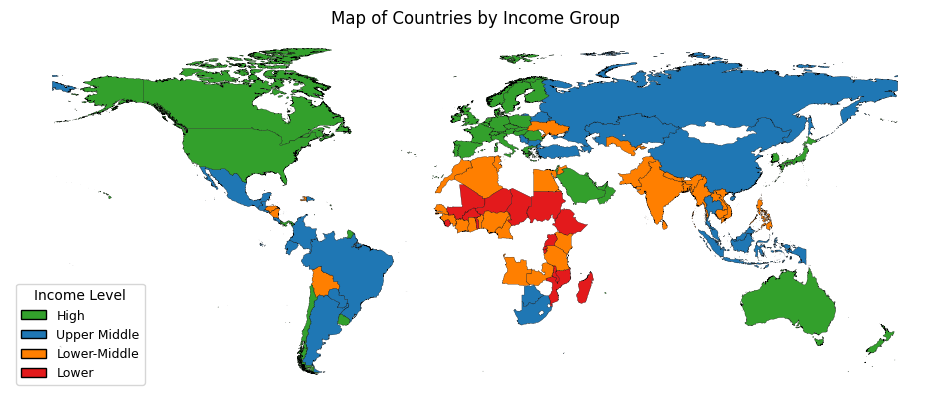

In [ ]:
# Chloropleth for Income Group Countries:
def get_income_label(row):
    if row['income_H'] == 1:
        return "High"
    elif row['income_UM'] == 1:
        return "Upper Middle"
    elif row['income_LM'] == 1:
        return "Lower-Middle"
    elif row['income_L'] == 1:
        return "Lower"
    else:
        return "Unknown"

# Create a new column with human-readable income labels
food_gdf['Income_Label'] = food_gdf.apply(get_income_label, axis=1)

# Define custom colors for each income category
colors = {
    "High": "#33a02c",
    "Upper Middle": "#1f77b4",
    "Lower-Middle": "#ff7f00",
    "Lower": "#e31a1c",
    "Unknown": "lightgrey"  # In case none of the binary flags is set
}

# Map each row to its corresponding color
food_gdf['color'] = food_gdf['Income_Label'].map(colors)

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
food_gdf.plot(color=food_gdf['color'], edgecolor='black', linewidth=0.2, ax=ax)
ax.set_title("Map of Countries by Income Group")
ax.set_axis_off()

# Build custom legend
legend_elements = [Patch(facecolor=colors[label], edgecolor='black', label=label)
                   for label in colors if label != "Unknown"]

ax.legend(handles=legend_elements, title="Income Level", loc='lower left', prop = {'size': 9}, markerscale = 0.7)
plt.show()

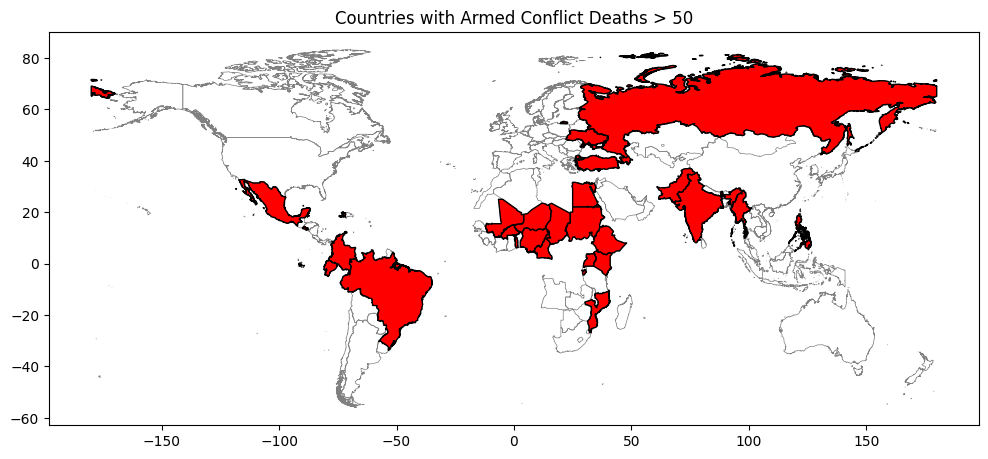

In [ ]:
# Conflicts
## VERY IMPORTANT: SET n (where n is the threshold for conflict related deaths. If greater than n we consider that country to have conflict)
## I was gonna do median but MEDIAN IS 0 WHILE MEAN IS 2,700 SO WE KINDA EYEBALL HERE
n = 50 #50, 81, 100 are good choices

# Convert final_final_dataset into a GeoDataFrame (if it's not one already)
gdf = gpd.GeoDataFrame(food, geometry='geometry')

# Set the CRS if not already set (adjust if your data uses a different CRS)
gdf.set_crs(epsg=4326, inplace=True)

# Filter for countries where Conflict > n
gdf_conflict = gdf[gdf['Conflict'] > n]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 9))

# First, plot all countries as an outline
gdf.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.5)

# Overlay the countries with Conflict > n in red fill (with black borders)
gdf_conflict.plot(ax=ax, color='red', edgecolor='black', linewidth=1)

# Add a title for clarity
ax.set_title(f"Countries with Armed Conflict Deaths > {n}")
plt.show()

#### **Correlations**

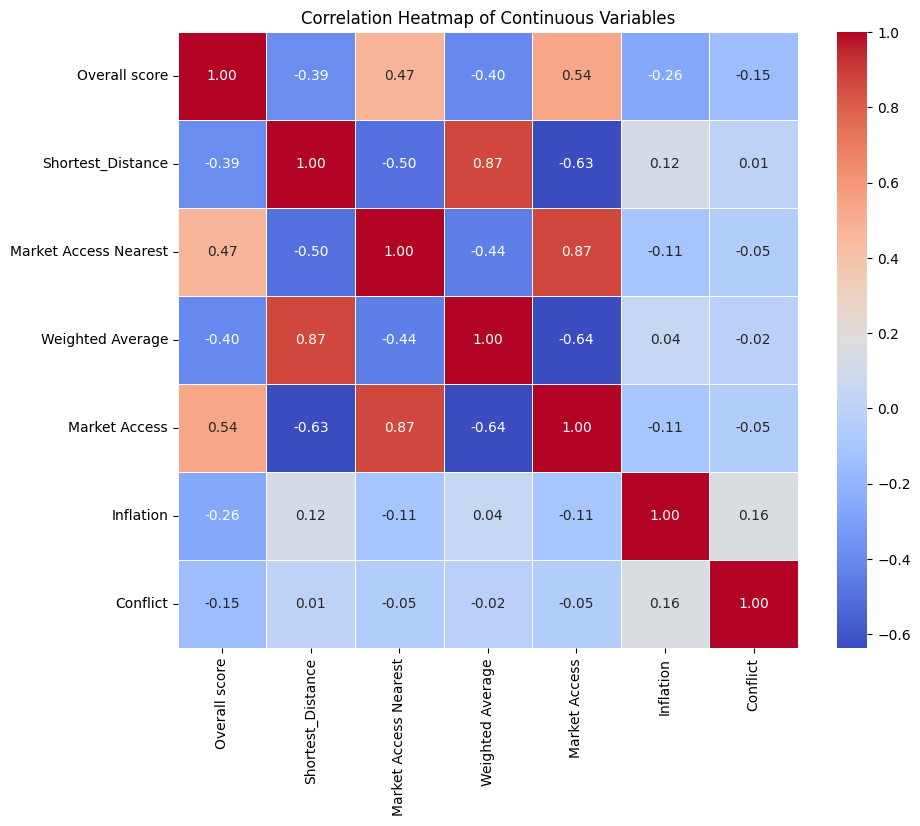

In [ ]:
# Correlation Heatmap of Continous Variables
continuous_vars = [
    "Overall score",
    "Shortest_Distance",
    "Market Access Nearest",
    "Weighted Average",
    "Market Access",
    "Inflation",   # 2022 data
    "Conflict"
]

# Create a subset of the DataFrame using the continuous variables
df_cont = food[continuous_vars]

# Calculate the correlation matrix
corr_matrix = df_cont.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with annotations
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

In [ ]:
# --- 1) Conflict Flag vs Overall Score ---
# Compute the point-biserial correlation between the binary "Conflict Flag" and "Overall score"
pb_corr, pb_p = pointbiserialr(food["Conflict Flag"], food["Overall score"])

# --- 2) Income vs Overall Score ---
# Derive a single income label from the binary income columns
def get_income_label(row):
    if row['income_H'] == 1:
        return "High"
    elif row['income_UM'] == 1:
        return "Upper Middle"
    elif row['income_LM'] == 1:
        return "Lower-Middle"
    elif row['income_L'] == 1:
        return "Lower"
    else:
        return "Unknown"

# Create a new income label column
food["Income_Label"] = food.apply(get_income_label, axis=1)

# Define the desired ordering for income categories (from lowest to highest)
income_order = ['Lower', 'Lower-Middle', 'Upper Middle', 'High']

# Convert income labels to an ordered categorical and then to numeric codes.
food["Income_Order"] = pd.Categorical(
    food["Income_Label"], categories=income_order, ordered=True
).codes

# Compute Spearman rank correlation for Income vs Overall Score
spearman_corr, spearman_p = spearmanr(food["Income_Order"], food["Overall score"])

# --- Create a Nice Summary Table ---
summary_data = {
    "Comparison": [
        "Conflict Flag vs Overall Score",
        "Income vs Overall Score"
    ],
    "Correlation": [pb_corr, spearman_corr],
    "p-value": [pb_p, spearman_p]
}

results = pd.DataFrame(summary_data)

# Format correlation values and p-values to 3 decimal places (p-value in scientific notation if needed)
results["Correlation"] = results["Correlation"].map(lambda x: f"{x:.3f}")
results["p-value"] = results["p-value"].map(lambda x: f"{x:.3g}")

# Display the table using Pandas styling for a nicer look
results_styled = results.style.set_caption("Correlation Summary") \
    .set_table_styles([
        {
            'selector': 'caption',
            'props': [('color', 'black'),
                      ('font-size', '16px'),
                      ('text-align', 'center')]
        },
        {
            'selector': 'th',
            'props': [('font-size', '12px'),
                      ('text-align', 'center'),
                      ('background-color', '#f0f0f0')]
        },
        {
            'selector': 'td',
            'props': [('font-size', '12px'),
                      ('text-align', 'center')]
        }
    ])

# Alternatively, for a simple printed table in the console
print("\nCorrelation Summary:")
print(results.to_markdown(index=False))


Correlation Summary:
| Comparison                     |   Correlation |   p-value |
|:-------------------------------|--------------:|----------:|
| Conflict Flag vs Overall Score |        -0.457 |  7.37e-07 |
| Income vs Overall Score        |         0.894 |  2.08e-38 |


# **Part 2: Statistical Analysis**
Regression with possible Models

In [ ]:
# Saved for Finals